In [1]:
include("include.jl")

┌ Info: Precompiling MDToolbox [7965e2f0-a35b-11e8-0207-19c030dd2def]
└ @ Base loading.jl:1260
┌ Warning: Package MDToolbox does not have CuArrays in its dependencies:
│ - If you have MDToolbox checked out for development and have
│   added CuArrays as a dependency but haven't updated your primary
│   environment's manifest file, try `Pkg.resolve()`.
│ - Otherwise you may need to report an issue with MDToolbox
└ Loading CuArrays into MDToolbox from project dependency, future warnings for MDToolbox are suppressed.


afmize_beta (generic function with 1 method)

  2.563860 seconds (4.14 M allocations: 3.067 GiB, 12.66% gc time)
  1.760010 seconds (2.04 M allocations: 2.967 GiB, 15.97% gc time)
  1.721934 seconds (2.04 M allocations: 2.967 GiB, 15.89% gc time)
  1.748994 seconds (2.04 M allocations: 2.967 GiB, 16.72% gc time)


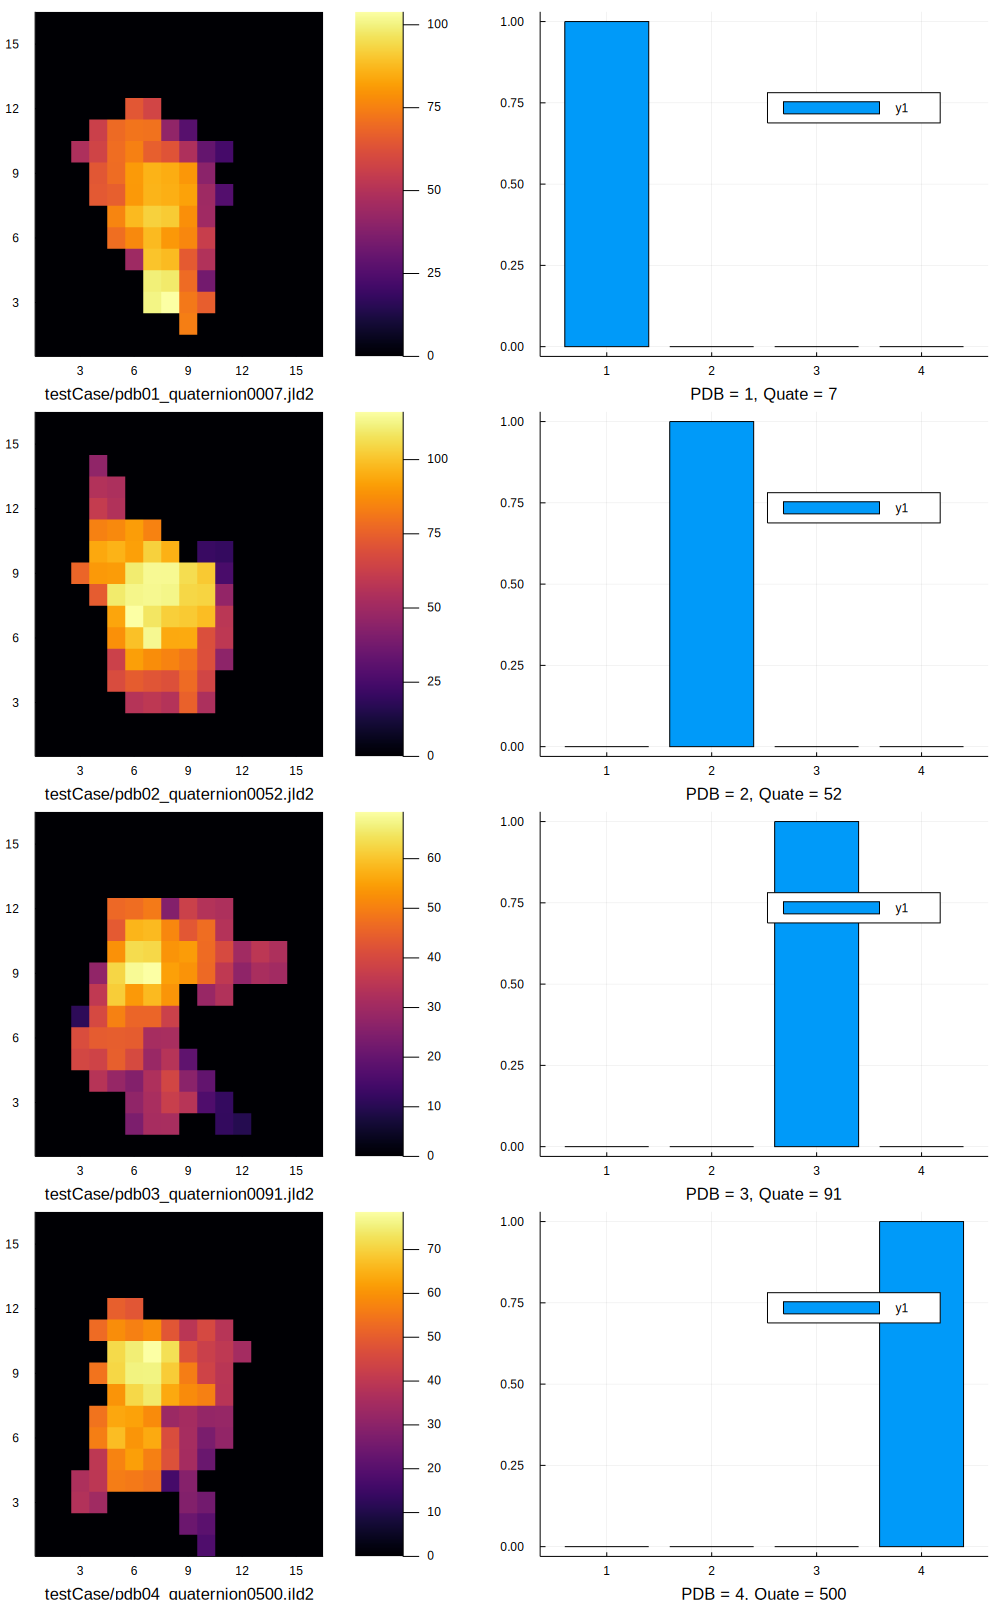

In [2]:
quateList = DelimitedFiles.readdlm("../quaternion/QUATERNION_LIST_576_Orient")
pdbList = [MDToolbox.readpdb("../model/0000$(i).pdb") for i in 1:4]
MDToolbox.decenter!.(pdbList)
@load "./testCase/fileNameList.jld2" fileNameList

resultList = BioAFMResult[]
afmDatas = []

for fileName in fileNameList
    @load fileName afmData
    @time result = BioAFM_QD(afmData, pdbList, quateList, 10)
    push!(afmDatas, afmData)
    push!(resultList, result)
end

plotPredictResult(fileNameList, afmDatas, resultList)